<a href="https://colab.research.google.com/github/cornpip/lab/blob/main/divimgtosound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0, 80]
[0, 80, 160]
[0, 80, 160, 241]
[0, 80, 160, 241, 321]
[0, 80, 160, 241, 321, 402]
(80, 611, 3)


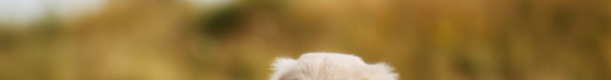

(80, 611, 3)


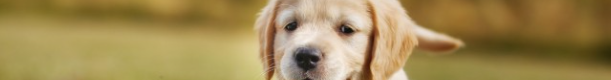

(81, 611, 3)


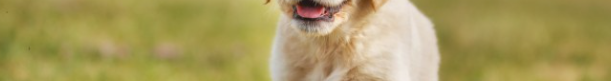

(80, 611, 3)


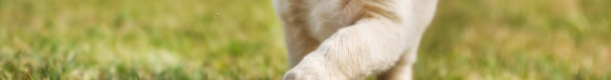

(81, 611, 3)


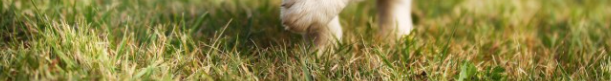

[0.07083423 0.09255457 0.0707802  0.02977091 0.02782581 0.03436352
 0.21050357 0.95007564 1.         0.15431165]
277.18266773960727


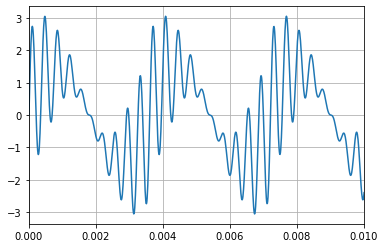

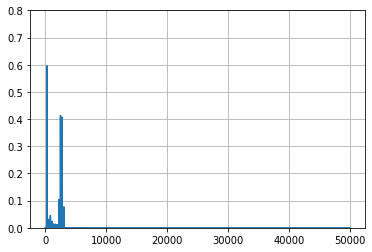

[0.10074757 0.26999305 0.28676982 0.24434979 1.         0.73965577
 0.96540334 0.61352573 0.02607789 0.00243394]
554.3653354792145


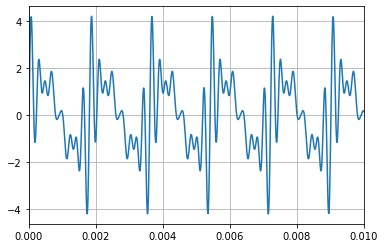

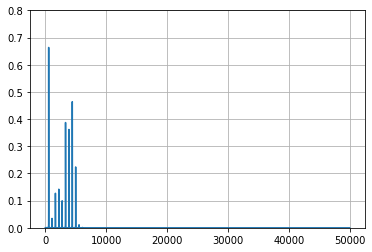

[0.03186646 0.16052167 0.08883238 0.06508633 0.10109503 0.21469877
 1.         0.36234262 0.00356806 0.00172251]
554.3653354792145


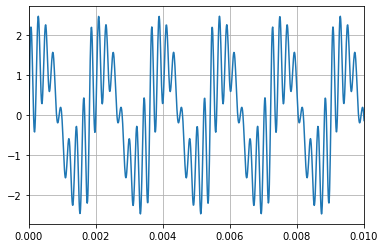

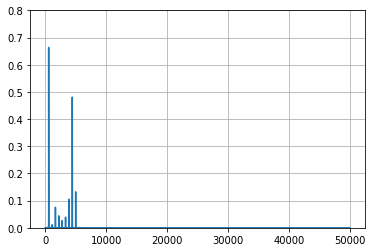

[0.20718167 0.1792464  0.10087408 0.13997165 0.29128278 0.8633357
 1.         0.0913064  0.01240255 0.00124026]
277.18266773960727


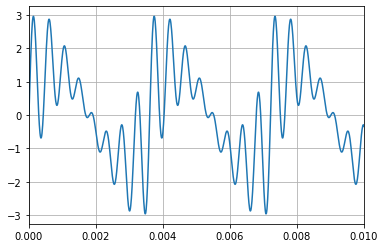

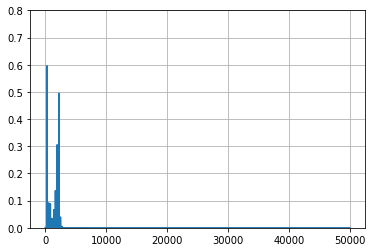

[0.05228256 0.05465587 0.07343292 0.345037   0.74724278 1.
 0.72469636 0.33037833 0.10016753 0.02673461]
369.99447178399845


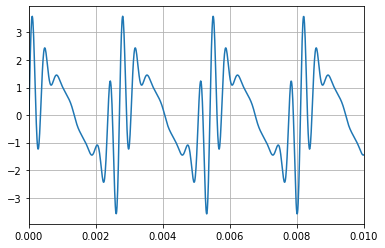

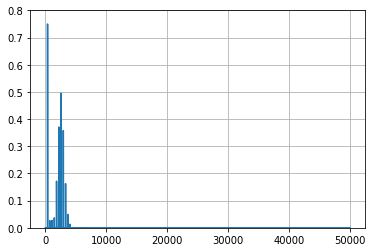

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import math
from scipy.io.wavfile import write

rowcolumn = 0  # 0=행 기준으로, 1=열 기준으로 자름
divnum = 5
first_oct = 32.7032

img = cv2.imread('/dog2.PNG')

img1 = img.copy()
divimage = []
r = [0]
for i in range(divnum):
  r.append(math.trunc(img1.shape[rowcolumn]/divnum * (i+1)))
  print(r)
  if (rowcolumn):
    divimage.append(img1[0:, r[i]:r[i+1]])
  else :
    divimage.append(img1[r[i]:r[i+1], 0:])

for i in range(divnum):
  print(divimage[i].shape)
  cv2_imshow(divimage[i])

for i in range(divnum):
  hsv = cv2.cvtColor(divimage[i], cv2.COLOR_BGR2HSV)
  h,s,v = cv2.split(hsv)
  hisH, bin = np.histogram(h, 12)
  hisS, bin2 = np.histogram(s, 10)
  hisV, bin3 = np.histogram(v, 7)

  his_H = np.array(hisH)
  hisH_max_index = np.argmax(his_H)

  his_S = np.array(hisS)
  hisS_max_index = np.argmax(his_S)
  his_S1 = his_S/max(hisS)
  print(his_S1)

  his_V = np.array(hisV)
  hisV_max_index = np.argmax(his_V)

  sound_oct = first_oct * 2 ** (hisV_max_index)
  f0 = sound_oct * 2 ** (hisH_max_index/12)
  print(f0)

  fs = 10e4
  t = np.arange(0, 2, 1 / fs )

  #f0 주파수가 1값으로 안나오고 고조파가 더 크게나와서 1.5로 일단 조정
  signal = 1.5*np.sin(2 * np.pi * f0 * t)  
  for j in range (len(his_S1)):
    signal += his_S1[j] * np.sin(2* np.pi *(j+2)*f0*t)
 
  #total_signal =
  plt.plot(t,signal)
  plt.xlim(0,0.01)
  plt.grid()
  plt.show()

  length = len(signal)
  fft = np.fft.fft(signal) / length
  fft = fft[range(math.trunc(length/2))]
  fft_abs = abs(fft)

  f = np.arange(length) * fs/length 
  f = f[range(math.trunc(length/2))]

  plt.plot(f, fft_abs)
  plt.ylim(0, 0.8)                                                                                     
  plt.grid()                                                                                  
  plt.show() 

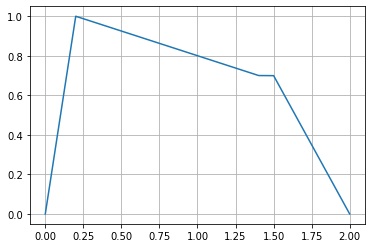

In [23]:
def Attack(x, t1):
  m = 1/t1
  y = m*x
  return y

def Decay(x, t1, t2, slevel):
  m = (1-slevel)/(t2-t1)
  y = -m*(x-t1) + 1
  return y

def Sustain(slevel):
  y = slevel
  return y

def Release(x, t3, t4, slevel):
  m = slevel/(t4-t3)
  y = -m*(x-t3)+slevel
  return y

t = np.arange(0, 2, 1 / fs )
envelope = []
t1, t2, t3, t4, slevel = (0.2, 1.4, 1.5, 2, 0.7)

for i in t:
  if (i < t1):
    envelope.append(Attack(i, t1))
  elif (t1 <= i < t2):
    envelope.append(Decay(i, t1, t2, slevel))
  elif (t2 <= i < t3):
    envelope.append(Sustain(slevel))
  elif (t3 <= i <= t4):
    envelope.append(Release(i, t3, t4, slevel))
   
plt.plot(t, envelope)
plt.grid()
plt.show()

ValueError: ignored

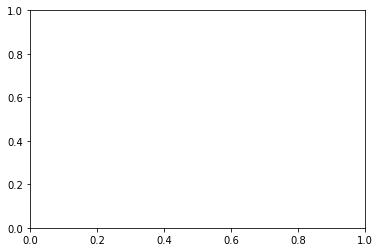

In [50]:
x = np.arange(0,1.5, 1/10)

y = []
for i in x:
  if (i < 1):
    y.append(i) 
  if (i >= 0.8):
    y += -i 

plt.plot(x, y)
plt.grid()
plt.show()
for i in x:
  if (i < 1):
    print(i)
  if (i >= 0.8):
    print("gell",i)
  